# Setiment Analysis on Zomato Food Reviews

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.metrics import (recall_score,accuracy_score, 
precision_score, confusion_matrix)
from sklearn.model_selection import train_test_split
import pickle, warnings
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
import seaborn as sb
from tkinter import *
from tkinter import messagebox

In [120]:
zom_df = pd.read_csv('zomato.csv')

In [121]:
zom_df.head(5)

,rate,reviews_list
0,4.1,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,4.1,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,3.8,"[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,3.7,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,3.8,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


In [122]:
def clean(x):
    #to remove html tag
    x = re.sub(r'<.*?>',' ',x)
    x= re.sub(r"can't",'can not',x)
    x= re.sub(r"don't",'do not',x)
    x= re.sub(r"didn't",'did not',x)
    #change to mobile number
    x= re.sub(r'[\d-]{10,12}','mobno',x)
    #to remove punctuatin and numbers
    x = re.sub(r'[^A-Za-z]',' ',x)
    #to replace more than 1 space with 1 space
    x = re.sub(r'\s+',' ',x)
    #to convert into lower
    return x.lower()

In [123]:
zom_df['reviews_list'] = zom_df.reviews_list.apply(clean)

In [124]:
zom_df.head()
print(zom_df.dtypes)

rate            float64
reviews_list     object
dtype: object


In [125]:
zom_df.head(5)

,rate,reviews_list
0,4.1,rated rated n a beautiful place to dine in th...
1,4.1,rated rated n had been here for dinner with f...
2,3.8,rated rated n ambience is not that good enoug...
3,3.7,rated rated n great food and proper karnataka...
4,3.8,rated rated n very good restaurant in neighbo...


In [126]:
def like(x):
    if (x > 3.7):
        x = 1
    else: x = 0
    return x

zom_df['rate'] = zom_df.rate.apply(like)

In [127]:
zom_df.head(101)

,rate,reviews_list
0,1,rated rated n a beautiful place to dine in th...
1,1,rated rated n had been here for dinner with f...
2,1,rated rated n ambience is not that good enoug...
3,0,rated rated n great food and proper karnataka...
4,1,rated rated n very good restaurant in neighbo...
...,...,...
95,0,rated rated n food is very tasty typical mang...
96,1,rated rated n the cakes have the perfect amou...
97,0,rated rated n no ventilation smokers sit in a...
98,0,rated rated n had samosa at this bakery outle...


In [128]:
zom_df.rate.value_counts()
print(zom_df.shape)

(100, 2)


In [129]:
xtrain,xtest,ytrain,ytest = train_test_split(zom_df['reviews_list'].values, zom_df['rate'].values,
                                            test_size=.20, random_state=10)

In [130]:
cv = CountVectorizer()
cv.fit(xtrain)

CountVectorizer()

In [131]:
cv.get_feature_names()
print(len(cv.get_feature_names()))
cv_train = cv.transform(xtrain).toarray()
cv_test = cv.transform(xtest)
print(cv_train.shape)
print(cv_test.shape)

4097
(80, 4097)
(20, 4097)


In [132]:
cv_train[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [133]:
nb = MultinomialNB(alpha=1)
lg = LogisticRegression()

In [134]:
nb.fit(cv_train,ytrain)

MultinomialNB(alpha=1)

In [135]:
lg.fit(cv_train,ytrain)

LogisticRegression()

In [136]:
lg_pred = lg.predict(cv_test)
nb_pred = nb.predict(cv_test)

In [137]:
print("Logistic Regression")
print("Training Score: ",lg.score(cv_train,ytrain))
print("Testing Score: ",lg.score(cv_test,ytest))
print()
print("Confusion Matrix")
print(confusion_matrix(ytest,lg_pred))
print(precision_score(ytest, lg_pred))
print(recall_score(ytest, lg_pred))
print(accuracy_score(ytest, lg_pred))

Logistic Regression
Training Score:  1.0
Testing Score:  0.5

Confusion Matrix
[[1 5]
 [5 9]]
0.6428571428571429
0.6428571428571429
0.5


In [138]:
print("Naive Bayes")
print("Training Score: ",nb.score(cv_train,ytrain))
print("Testing Score: ",nb.score(cv_test,ytest))
print("Confusion Matrix")
print(confusion_matrix(ytest,nb_pred))
accuracy_score(ytest,nb_pred)

Naive Bayes
Training Score:  0.95
Testing Score:  0.65
Confusion Matrix
[[ 3  3]
 [ 4 10]]


0.65

In [139]:
from sklearn.model_selection import GridSearchCV,KFold

In [140]:
p = {'alpha':[100,10,1,.1,.01,.001,.0001]}
kf = KFold(5,shuffle=True)

In [141]:
gd = GridSearchCV(MultinomialNB(),param_grid=p,cv=kf,scoring='accuracy')
gd.fit(cv_train,ytrain)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=MultinomialNB(),
             param_grid={'alpha': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='accuracy')

In [142]:
gd.best_params_

{'alpha': 1}

<AxesSubplot:ylabel='Density'>

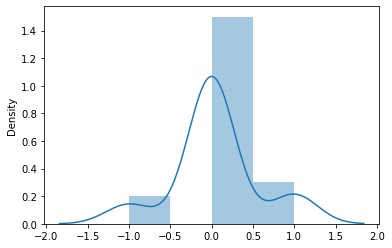

In [108]:
warnings.filterwarnings("ignore")
sb.distplot((ytest-nb_pred))

In [143]:
r = np.array(["Worst Experience ever","I must say it fabulus","Horrible! Don't ever visit again",
             "I hate this","I love this food","amazing food"])
cvr = cv.transform(r)
print(cvr.shape)
naive=nb.predict(cvr)
logistic=lg.predict(cvr)
mydf = pd.DataFrame({"Comment":r,"Naive Prediction":naive,"Logistic's Prediction":logistic})
mydf

(6, 4097)


,Comment,Naive Prediction,Logistic's Prediction
0,Worst Experience ever,0,0
1,I must say it fabulus,1,0
2,Horrible! Don't ever visit again,0,0
3,I hate this,1,0
4,I love this food,1,0
5,amazing food,1,0


In [144]:
filename="review_model_log.pkl"
file = open(filename,"wb")
pickle.dump(lg,file)
file.close()

In [145]:

fl = open("review_model_log.pkl","rb")
c = pickle.load(fl)


In [146]:
countvector = "review_cv.pkl"
cfile = open(countvector,"wb")
pickle.dump(cv,cfile)
file.close()

In [147]:
cfl = open("review_cv.pkl","rb")
cv=pickle.load(cfl)
cv

CountVectorizer()

In [157]:
def get_pred():
    rv = lb.get("1.0",END)
    tst = cv.transform([rv])
    rs = c.predict(tst)
    label ={0:"Negative",1:"Positive"}
    dd = label[rs[0]]
    lbl1.config(text=dd,fg="green")
    messagebox.showinfo("Result",dd)
main = Tk()
main.title("Zomato")
lbl= Label(text="Food Review Sentiments",fg="white",bg="black",font=("ariel",20))
lbl.pack()

lbl1= Label(bg="white",font=("Ariel",20))
lbl1.pack()

lb = Text(main,)
lb.pack(pady=3)

btn = Button(main,bg="blue",fg="white",text="Predict",height=5,command=get_pred)
btn.pack(fill="x",pady=3)
main.mainloop()